In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 1s 0us/step


In [10]:
len(X_train),len(X_test),X_train[0].shape,X_train[0],y_train[0]

(60000,
 10000,
 (28, 28),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 

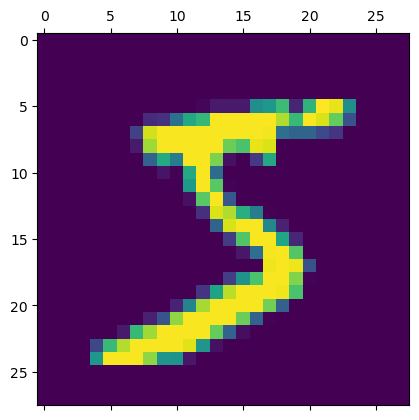

In [9]:
plt.matshow(X_train[0])

In [11]:
#scale the data
X_train = X_train / 255
X_test = X_test / 255
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
#Flatten the training and test data to 1 D array to feed into layer 1D neural network
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape, y_train.shape, X_test_flattened.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-02-20 08:43:42.731874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4729 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 999us/step - loss: 0.3045 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9253


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 954us/step - loss: 0.2740 - accuracy: 0.9232


[0.27395468950271606, 0.9232000112533569]

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 849us/step


array([2.6540300e-02, 3.5255869e-07, 3.8062800e-02, 9.4589609e-01,
       1.6533392e-03, 1.2937729e-01, 1.2542828e-06, 9.9969530e-01,
       7.7945888e-02, 7.2525167e-01], dtype=float32)

(<matplotlib.image.AxesImage at 0x7fb0c106c130>, 7)

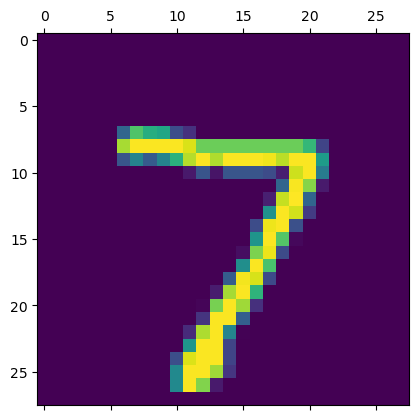

In [20]:
plt.matshow(X_test[0]),np.argmax(y_predicted[0])

Text(95.72222222222221, 0.5, 'Digits Truth')

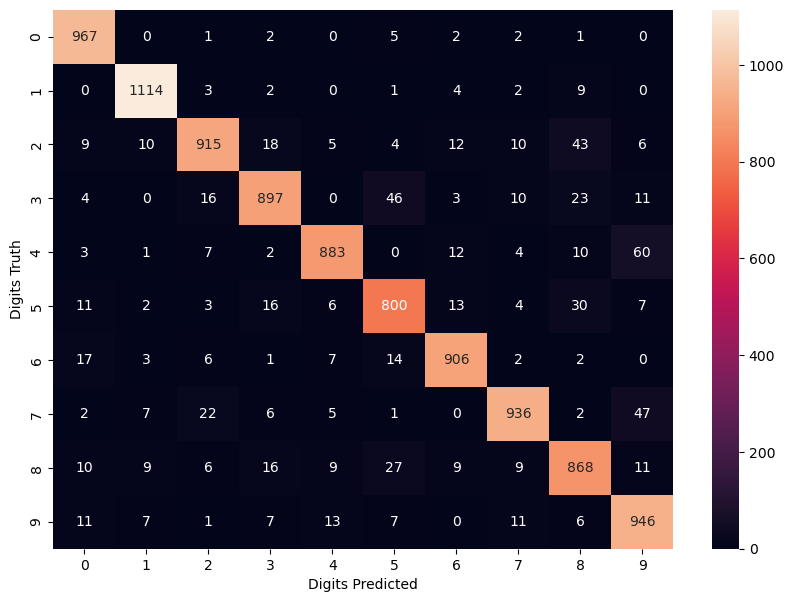

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Digits Predicted')
plt.ylabel('Digits Truth')

In [25]:
#Use a hiddien layer in the neural network , check if accuracy is imporved
model = keras.Sequential([
    #hidden layer
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    #output layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2637 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1211 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9840


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9755


[0.08359399437904358, 0.9754999876022339]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

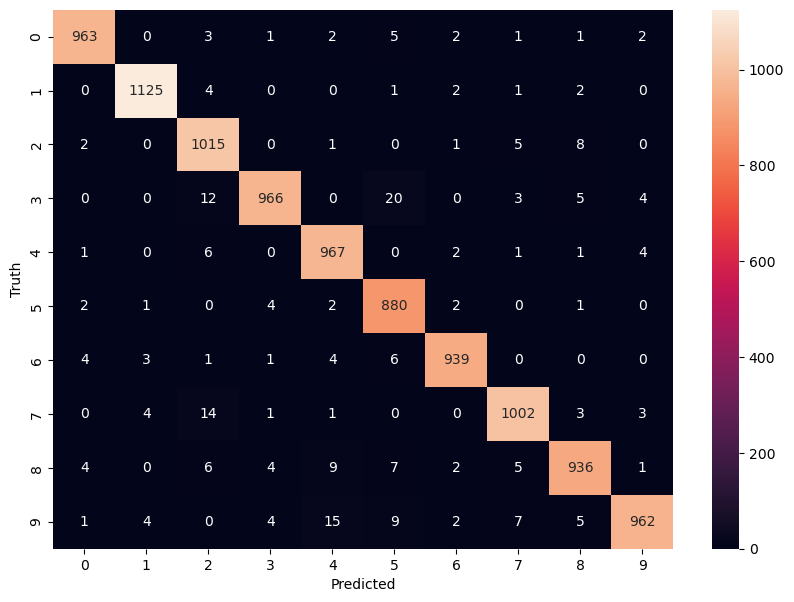

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
#Use a flatten layer so we dont have to call reshape on input data
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2753 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1251 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0881 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9770


[0.0769314169883728, 0.9769999980926514]